<a href="https://colab.research.google.com/github/HugeHamster-YWang/FilesForCSC3160/blob/main/assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1 (CSC3160/MDS6002)

This is an instruction and template for the first assignment. In this assignment, you will utilize various tools to extract spectrogram features, perform speech recognition, generate speech, and align speech. Additionally, you will summarize the provided research paper. 

Should you have any inquiries, please feel free to ask in the GitHub discussion forum found at: https://github.com/orgs/SLPcourse/discussions/categories/assignments.

Please follow the template to finish your assignment and submit in GitHub.

## Example: Extracting spectrogram

In [2]:
!pip install torch>=1.2.0     #install torch
!pip install torchaudio       #install torchaudio
#sets the backend of matplotlib to the 'inline' backend
%matplotlib inline

!pip install librosa          #install librosa


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Shape of waveform: torch.Size([1, 139421])
Sample rate of waveform: 22050
Shape of resampled_waveform: torch.Size([1, 101168])


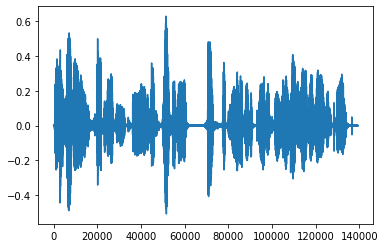

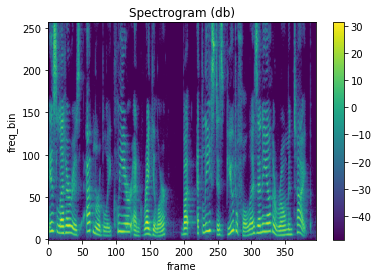

In [3]:
import requests
import torchaudio
import matplotlib.pyplot as plt
import torchaudio.functional as F
import torchaudio.transforms as T
import librosa

target_sample_rate = 16000
n_fft = 512

# a function to plot spectrogram
def plot_spectrogram(specgram, title=None, ylabel="freq_bin"):
    fig, axs = plt.subplots(1, 1)
    axs.set_title(title or "Spectrogram (db)")
    axs.set_ylabel(ylabel)
    axs.set_xlabel("frame")
    im = axs.imshow(librosa.power_to_db(specgram), origin="lower", aspect="auto")
    fig.colorbar(im, ax=axs)
    plt.show(block=False)

# url to find the audio sample
url = "https://drwuz.com/CSC3160/materials/audio/LJ001-0048.wav"
# request the url
r = requests.get(url)

# filename, where to save the audio
filename = "LJ001-0048.wav"
with open(filename, 'wb') as f:
    f.write(r.content)

# load audio sample to memory
waveform, sample_rate = torchaudio.load(filename)

# create an object that resamples a waveform
resampler = T.Resample(sample_rate, target_sample_rate, dtype=waveform.dtype)
# resample a waveform from its original sampling rate to the target sampling rate
resampled_waveform = resampler(waveform) 

# create an object that extract spectrogram
spec_trans = T.Spectrogram(n_fft=n_fft, power=2)

# extract spectrogram
spec = spec_trans(resampled_waveform)

print("Shape of waveform: {}".format(waveform.size()))
print("Sample rate of waveform: {}".format(sample_rate))

print("Shape of resampled_waveform: {}".format(resampled_waveform.size()))

plt.figure()
plt.plot(waveform.t().numpy())

plot_spectrogram(spec[0])


## (1) [10 marks] Extract mel-spectrogram

In this part, you need to extract power spectorgram (FFT 1024) and 80-dimensional mel-spectrogram (80 Mel Filter Banks) with 5ms, 10ms, 15ms frameshift, with the same window size 30ms. The speech signal is at 16 kHz sampling rate.
* Visualize each of the power spectorgram (FFT 1024) and 80-dimensional mel-spectrogram
* Plot the spectrum of the 150th frame of the 512-dimensional spectrogram with 10 ms frameshift



Power spectrogram for 5 ms


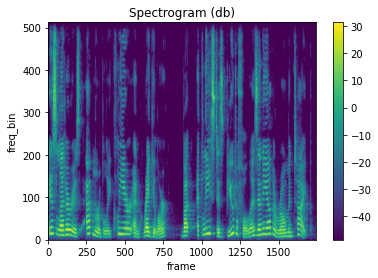

Mel-spectrogram for 5 ms


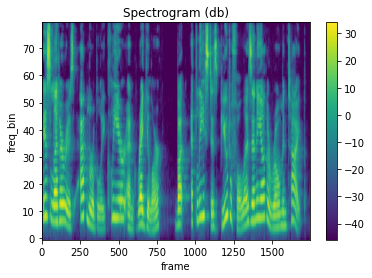

Power spectrogram for 10 ms


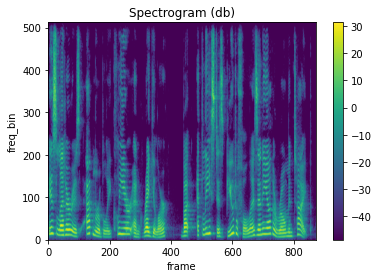

Mel-spectrogram for 10 ms


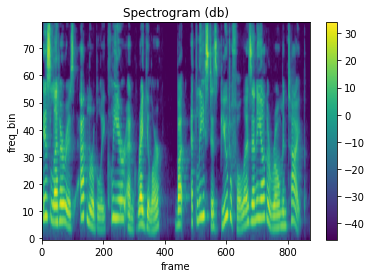

Power spectrogram for 15 ms


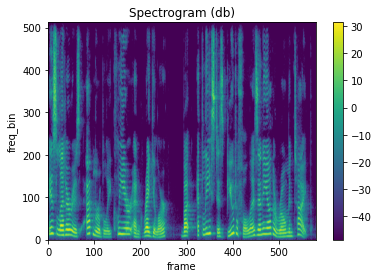

Mel-spectrogram for 15 ms


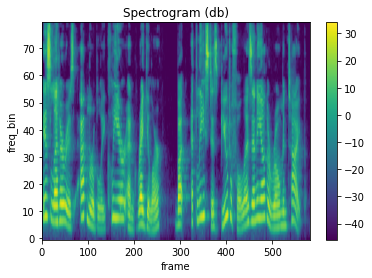

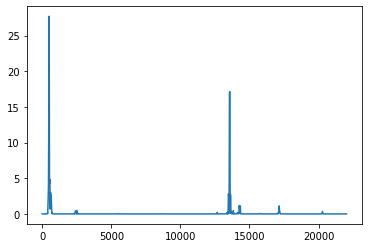

In [4]:

# Write your implementation here
## 
import numpy as np
def show_spectrogram(file, frameshift=5, window_size = 30):
  waveform, sample_rate = torchaudio.load(filename)
  window_length = window_size*16
  hop_length = frameshift*16
  transform_spec = torchaudio.transforms.Spectrogram( n_fft= 1024, win_length = window_length, hop_length = hop_length)
  spec = transform_spec(waveform)
  print("Power spectrogram for "+str(frameshift)+" ms")
  plot_spectrogram(spec[0])
  transform_mel = torchaudio.transforms.MelSpectrogram( n_fft= 1024, win_length = window_length, hop_length = hop_length, n_mels = 80)
  print("Mel-spectrogram for "+str(frameshift)+" ms")
  mel = transform_mel(waveform)
  plot_spectrogram(mel[0])
frameshift_values = [5,10,15]



def show_frame_spectrum(file, frameshift=10, window_size = 30, frame_number = 150):
  waveform, sample_rate = torchaudio.load(filename)
  #print(sample_rate)
  #print(waveform[0][1490:1520])
  window_length = window_size*16
  hop_length = frameshift*16
  transform_spec = torchaudio.transforms.Spectrogram( n_fft= 512, win_length = window_length, hop_length = hop_length)
  spec = transform_spec(waveform)
  spec_slice = spec[0][frame_number-1]
  spec_size = spec_slice.size()[0]

  list0 = np.array(range(0, spec_size))
  freq = sample_rate*list0/spec_size
  ###make spectrum plots
  plt.subplots(1)
  plt.plot(freq,spec_slice)
  plt.show(block=False)
  ##make s
  #print(spec[0][frame_number-1])
for i in frameshift_values:
  show_spectrogram(filename, frameshift = i)
show_frame_spectrum(filename, frameshift=10)

## (2) [10 marks] Record yourself

Record yourself to read the following script, which is the same as LJ001-0048.wav. Then, resample your recording to 16 kHz and 16-bit depth.

`his letter is admirably clear and regular, but at least as beautiful as any other Roman type.`

You can use your phone to record and upload to GitHub.

In [5]:

import torch
#Write your implementation here
waveform, sample_rate = torchaudio.load("https://raw.githubusercontent.com/HugeHamster-YWang/FilesForCSC3160/main/recording.wav")
#waveform = torch.mean(waveform,dim=0)
# resample the waveform
target_sample_rate = 16000

resampler = T.Resample(sample_rate, target_sample_rate, dtype=torch.float)
# resample a waveform from its original sampling rate to the target sampling rate
resampled_waveform = resampler(waveform)
#resampled_waveform = resampler.half()
torchaudio.save("resampled_waveform.wav",resampled_waveform,sample_rate = target_sample_rate,bits_per_sample= 16)

## (3) [10 marks] Speech recognition with Whisper model

[Whisper](https://github.com/openai/whisper) is a general-purpose speech recognition model released by OpenAI. Your task is to use the whisper model to perform speech recognition on the provided audio sample and your own recording. 

In [6]:
#import whisper
!pip install -U openai-whisper
# !pip uninstall ffmpeg
# !pip uninstall ffmpeg-python
# !pip uninstall python-ffmpeg

!pip install ffmpeg-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 40.4 MB/s eta 0:00:00
  Created wheel for openai-whisper: filename=openai_whisper-20230124-py3-none-any.whl size=1179329 sha256=cf0246fe99336a8dcc6a32a3b3e228c32f100ebf94d4de80e023d5b426ba0ed1
  Stored in directory: /root/.cache/pip/wheels/48/c2/dd/8639c7cda1e20412e499ab65e5003d8863ef8622792ea26446
Successfully built openai-whisper
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


2023-02-13 15:01:42.647714: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-13 15:01:42.647859: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-13 15:01:42.647884: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
100%|███████████████████████████████████████| 461M/461M [00:14<00:00, 32.8MiB/s]
/usr/local/lib/python3.8/dist-

In [7]:
# Write your implementation here

!whisper LJ001-0048.wav --language English

!whisper resampled_waveform.wav --language English


2023-02-14 11:03:29.849681: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-14 11:03:31.874714: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-14 11:03:31.874853: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-14 11:03:31.874873: W tensorfl

## (4) [10 marks] Text-to-speech synthesis

Text-to-speech synthesis is to generate speech for a given text. Torchaudio has provided pretrained [Tacotron2-based model](https://pytorch.org/audio/stable/generated/torchaudio.pipelines.Tacotron2TTSBundle.html#torchaudio.pipelines.Tacotron2TTSBundle). Your task is to 
* Use the pretrained bundle to generate speech using the Character-based TTS pipeline with Tacotron2 and WaveRNN.
* Use the pretrained bundle to generate speech using the Phoneme-based TTS pipeline with Tacotron2 and WaveRNN.
* Discuss the difference between two audio samples from the above two pipelines.

The script you need to use for the text-to-speech synthesis task:

`I am <YOUR_NAME>, my student ID is <YOUR_STUDENT_ID>. I am taking the [CSC3160/MDS6002] course this semester.`


***Note: Replace `<YOUR_NAME>` and `<YOUR_STUDENT_ID>` with your real name and your student ID, respectively.***

In [8]:
##install deepPhonemizer
!pip install deep-phonemizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for deep-phonemizer: filename=deep_phonemizer-0.0.17-py3-none-any.whl size=29727 sha256=e26eb3d04c68f26334b914c95cf80f3dc7ce8cd7d2d55e3b19e7d60c7c9263a4
  Stored in directory: /root/.cache/pip/wheels/e4/cc/ce/e329d15bd6374b9bcdc717d00c4d0f934c3ca2091ebf0a1968
Successfully built deep-phonemizer


In [9]:
# Write your implementation here

text = ["I am Wang Yitao, my student ID is 120090356.","I am taking the CSC3160 course this semester."]
title = ['self_intro_1','self_intro_2']
def Character_based_synthesis(text,title):
  bundle = torchaudio.pipelines.TACOTRON2_WAVERNN_CHAR_LJSPEECH

  # Build processor, Tacotron2 and WaveRNN model
  processor = bundle.get_text_processor()
  tacotron2 = bundle.get_tacotron2()
  vocoder = bundle.get_vocoder()

  # Encode text
  input, lengths = processor(text)
  specgram, lengths, _ = tacotron2.infer(input, lengths)
  waveforms, lengths = vocoder(specgram, lengths)
  torchaudio.save('Charater_based_'+title+'.wav', waveforms, vocoder.sample_rate)
def Phoneme_based_synthesis(text,title):
  bundle = torchaudio.pipelines.TACOTRON2_WAVERNN_PHONE_LJSPEECH

  # Build processor, Tacotron2 and WaveRNN model
  processor = bundle.get_text_processor()
  tacotron2 = bundle.get_tacotron2()
  vocoder = bundle.get_vocoder()

  # Encode text
  input, lengths = processor(text)
  specgram, lengths, _ = tacotron2.infer(input, lengths)
  waveforms, lengths = vocoder(specgram, lengths)
  torchaudio.save('Phoneme_based_'+title+'.wav', waveforms, vocoder.sample_rate)

Character_based_synthesis(text[0],title[0]) 
Phoneme_based_synthesis(text[0],title[0])
Character_based_synthesis(text[1],title[1])
Phoneme_based_synthesis(text[1],title[1])

Downloading: "https://download.pytorch.org/torchaudio/models/tacotron2_english_characters_1500_epochs_wavernn_ljspeech.pth" to /root/.cache/torch/hub/checkpoints/tacotron2_english_characters_1500_epochs_wavernn_ljspeech.pth


  0%|          | 0.00/107M [00:00<?, ?B/s]

Downloading: "https://download.pytorch.org/torchaudio/models/wavernn_10k_epochs_8bits_ljspeech.pth" to /root/.cache/torch/hub/checkpoints/wavernn_10k_epochs_8bits_ljspeech.pth


  0%|          | 0.00/16.7M [00:00<?, ?B/s]

  0%|          | 0.00/63.6M [00:00<?, ?B/s]

Downloading: "https://download.pytorch.org/torchaudio/models/tacotron2_english_phonemes_1500_epochs_wavernn_ljspeech.pth" to /root/.cache/torch/hub/checkpoints/tacotron2_english_phonemes_1500_epochs_wavernn_ljspeech.pth


  0%|          | 0.00/107M [00:00<?, ?B/s]

KeyboardInterrupt: ignored

Analysis: In both synthesis method, the numbers of student id are not included. This means that both model doesn't take reading numbers into account. 
And the two synthesis have some different processing ways on some special words. For example, it successfully read ID but character based synthesis read like "id". And phoneme based model pronounce Chinese names better

## (5) [10 marks] Fundamental frequency

Extract the fundamental frequency (F0) trajectory of the provided speech sample and your own recording, and calculate the mean of your fundamental frequency trajectory. Both audio samples need to at 16 kHz, and the hop length should 160.

In this task, you need to:
* Plot the fundamental frequency trajectory and the F0 mean of the provided speech sample
* Plot the fundamental frequency trajectory and the F0 mean of your own recording

You can use the [API from librosa](https://librosa.org/doc/main/generated/librosa.pyin.html). 

The mean frequency of LJ001-0048.wav is 165.384073613875
The mean frequency of resampled_waveform.wav is 92.2993644734638


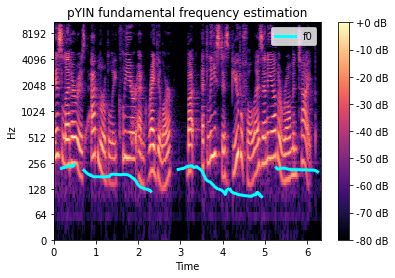

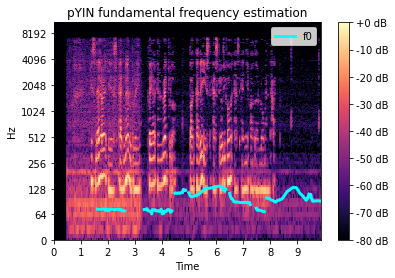

In [10]:
# Write your implementation here
import librosa.display
import numpy as no
import matplotlib.pyplot as plt
# def get_mean(list):
#   temp = 0
#   count = 0
#   #print(list)
#   for i in list:
#     print(i.dtype())
#     if i != np.nan:
#       temp = temp + i
#       count = count + 1
#     #print(temp,count)
#   return temp/count


def F0(filename):
  y,sr = librosa.load(filename)
  f0, voiced_flag, voiced_probs = librosa.pyin(y,sr=16000,hop_length = 160,fmin=librosa.note_to_hz('C2'),fmax=librosa.note_to_hz('C7'))
  times = librosa.times_like(f0)

  meanFrequency = np.nanmean(f0)
  print("The mean frequency of "+filename+" is "+ str(meanFrequency))
  D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
  fig, ax = plt.subplots()
  img = librosa.display.specshow(D, x_axis='time', y_axis='log', ax=ax)
  ax.set(title='pYIN fundamental frequency estimation')
  fig.colorbar(img, ax=ax, format="%+2.f dB")
  ax.plot(times, f0, label='f0', color='cyan', linewidth=3)
  ax.legend(loc='upper right')
F0("LJ001-0048.wav")
F0("resampled_waveform.wav")

## (6) [20 marks] Dynamic time warping

Now you have the reference speech (https://drwuz.com/CSC3160/materials/audio/LJ001-0048.wav) and your own recording. Their lengths are different. In some tasks, we need to align the speech to have same length. Please use Dynamic Time Warping to align your recording and reference speech sample. You need to align them by using 80-dimensional mel-spectrogram.

Here are your tasks:
* Visualize the alignment 80-dimensional mel-spectrogram of the reference speech and your own recording
* Visualize the wraped path/map from the DTW algorithm. [Here](https://raw.githubusercontent.com/cbellei/DTW/master/DTW.png) is how the wraped path may look like.

You can use [FastDTW](https://github.com/slaypni/fastdtw) tool to align them.




In [11]:
##pip install
!pip install fastdtw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


(0, 0)
235149 235149
mel_spectrogram for speech sample LJ001-0048.wav


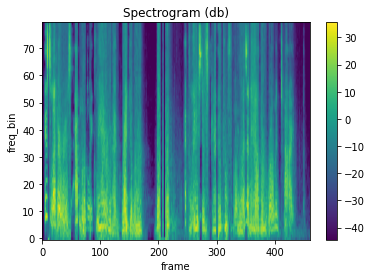

mel_spectrogram for own speech sample


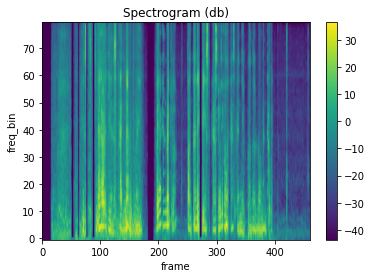

(0, 0)


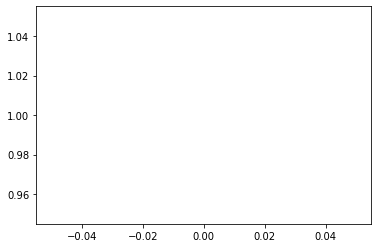

In [22]:
# Write your implementation here
import numpy as np
import torch
from scipy.spatial.distance import euclidean
from fastdtw import fastdtw

waveform_0,sr0 = torchaudio.load("LJ001-0048.wav")
waveform_0 = torch.mean(waveform_0,dim=0)
# print(waveform_0)
waveform_1,sr1 = torchaudio.load("resampled_waveform.wav")
waveform_1 = torch.mean(waveform_1,dim=0)
# print(waveform_1)
def changeToArray(waveform):
  array = np.array()
  for i in len(waveform):
    array= np.concatenate((array,[waveform[i],i]))

distance, path = fastdtw(waveform_0,waveform_1,dist=euclidean)
#Align own recording to LJ001-0048 
print(path[0])
aligned_waveform_list_0 = []
aligned_waveform_list_1 = []
for i in path:
  aligned_waveform_list_0.append(waveform_0[i[0]])
  aligned_waveform_list_1.append(waveform_1[i[1]])
aligned_waveform_0 =torch.tensor(aligned_waveform_list_0)
aligned_waveform_1 =torch.tensor(aligned_waveform_list_1)
print(len(aligned_waveform_1),len(aligned_waveform_0))

def show_mel_spectrogram(waveform):
   transform_mel = torchaudio.transforms.MelSpectrogram( n_fft= 1024,n_mels = 80)
   mel = transform_mel(waveform)
   plot_spectrogram(mel)
print("mel_spectrogram for speech sample LJ001-0048.wav")
show_mel_spectrogram(aligned_waveform_0)
print("mel_spectrogram for own speech sample")
show_mel_spectrogram(aligned_waveform_1)


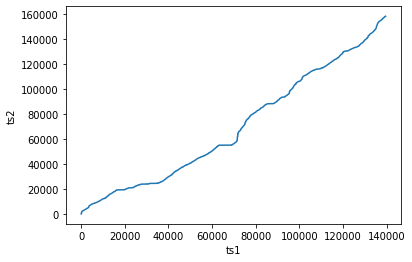

In [29]:
ts1=[]
ts2=[]
for i in path:
  ts1.append(i[0])
  ts2.append(i[1])
plt.plot(ts1,ts2)
plt.xlabel("ts1")
plt.ylabel("ts2")
plt.show()

## (7) [30 marks] Paper reading

Please read the paper provided below and summarize its key points in 200-300 words. Your summary should include
* a description of the problem being addressed
* the paper's main contributions
* the metrics used for evaluation, and the experimental results
* the findings from the paper

[*PitchNet: Unsupervised Singing Voice Conversion with Pitch Adversarial Network*](https://arxiv.org/abs/1912.01852)

**Note: longer than 300 words may have negative impact.**

```
# Write your summary here (200-300 words)
```
Summary

The paper is about singing voice conversion. It is a main way to synthesize singing by extracting singing from music and reproducing it with another person’s voice.

The team focuses on the problem that the quality of synthesized singing is sometimes poor since the model needs to learn from both phonetic and pitch representations. The main contribution of the paper is a new model called ‘PitchNet’. The input waveform is first encoded by an average pooling layer to extract high-dimensional features. The Target singer’s embedding vectors are then concatenated to related encoded parts to be condition vectors. Separately extracted pitch is fed back as a compensation signal with condition vectors. Then the decoding layer decodes condition vectors. For training loss, three loss functions, reconstruction loss, singer classification loss, and pitch regression loss are applied to guide the model in different aspects.

For experiments, they use the male singer part NUS-48E dataset and convert one song to other singers’ voices. They use NCC(Normalized Cross Correlation, meaning how much the output pitch matches the input pitch) and MOS (Mean Opinion Score, to evaluate the quality of output audio) on both USVC and Pitchnet, most of the score is higher than the original paper’s model. Qualitative analysis shows that the output pitch changes significantly with the input pitch. 

In conclusion, the paper finds a novel unsupervised singing conversion model that outperforms existing models with the flexibility to manipulate pitch of the audio. 


